## Introduction to Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Loading train data

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


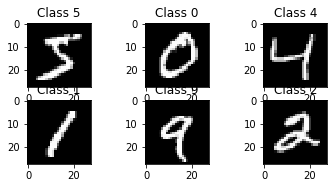

In [3]:
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 784)
Testing shape (10000, 784)


Modify the target matrices to be in the one-hot format

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Dense Layer

Lab 1.1 We only have dense layer.

Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

Dense layers have 512 units and activation function is 'relu'.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer. 

function -> Dense(units , activation = 'activation')(previous_layer)

In [6]:
# create only dense layer
input_tensor = Input(shape = (784,))
hidden_layer = Dense(512 , activation = 'relu')(input_tensor)
pred = Dense(10, activation = 'softmax')(hidden_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

W0314 16:02:43.498235 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0314 16:02:43.534864 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 16:02:43.545848 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0314 16:02:43.584322 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0314 16:02:43.610412 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anac

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

W0314 16:02:43.746525 13980 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0314 16:02:43.860119 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.3018 - acc: 0.9161 - val_loss: 0.1623 - val_acc: 0.9547
Epoch 2/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.1260 - acc: 0.9641 - val_loss: 0.1285 - val_acc: 0.9638
Epoch 3/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.0818 - acc: 0.9764 - val_loss: 0.0937 - val_acc: 0.9713
Epoch 4/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.0574 - acc: 0.9835 - val_loss: 0.0868 - val_acc: 0.9730
Epoch 5/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0424 - acc: 0.9880 - val_loss: 0.0896 - val_acc: 0.9737
Epoch 6/10
48000/48000 [==============================] - 4s 90us/step - loss: 0.0310 - acc: 0.9919 - val_loss: 0.0757 - val_acc: 0.9770
Epoch 7/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0231 - acc: 0.9942 - val_loss: 0.0779 - val_acc

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06679307970063528
Test accuracy: 0.9809


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

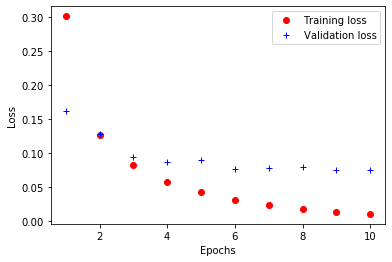

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

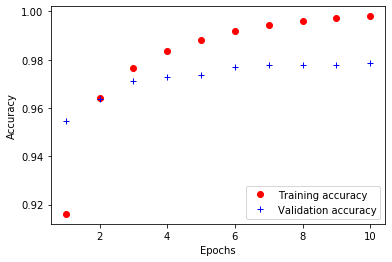

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Dense + Dropout Layer

Lab 1.2 We have 2 dense layer and dropout layer.

Dense layers have 512 units and activation function is 'relu'.

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax .

function -> Dense(units , activation = 'activation')(previous_layer)

function -> Dropout(rate)(previous_layer)

In [12]:
# create only dense + dropout layer
input_tensor = Input(shape = (784,))
hidden_layer = Dense(512 , activation = 'relu')(input_tensor)
drop_layer = Dropout(0.2)(hidden_layer)
pred = Dense(10, activation = 'softmax')(drop_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

W0314 16:03:25.797046 13980 deprecation.py:506] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.3179 - acc: 0.9093 - val_loss: 0.1515 - val_acc: 0.9578
Epoch 2/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.1383 - acc: 0.9599 - val_loss: 0.1111 - val_acc: 0.9673
Epoch 3/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.0948 - acc: 0.9728 - val_loss: 0.0958 - val_acc: 0.9720
Epoch 4/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0716 - acc: 0.9791 - val_loss: 0.0851 - val_acc: 0.9752
Epoch 5/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0572 - acc: 0.9834 - val_loss: 0.0819 - val_acc: 0.9747
Epoch 6/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0467 - acc: 0.9853 - val_loss: 0.0733 - val_acc: 0.9772
Epoch 7/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.0372 - acc: 0.9890 - val_loss: 0.0699 - val_a

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06596814294030773
Test accuracy: 0.9801


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

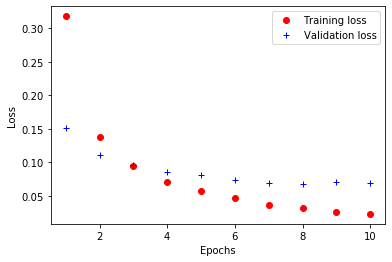

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

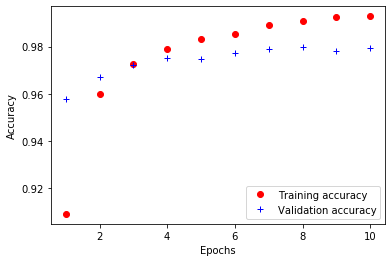

In [17]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Convolutional Neural Network (CNN)

We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values

The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . 

Our model have architecture belowing:

![](https://pbs.twimg.com/media/DJDu-seXcAAvqZf.jpg:large)

*(Source: https://twitter.com/DeepLearn007/status/905486345862344704)*

Try to create model like architecture.

Function :

    1. Conv2D(filters, kernel_size, activation = 'activation')(previous_layer)
    2. MaxPooling2D(pool_size)(previous_layer)
    3. Dropout(rate)(previous_layer)
    4. Flatten()(previous_layer)
    5. Dense(units , activation = 'activation')(previous_layer)

In [18]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28 ,28 ,1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [19]:
def create_model():
    input_tensor = Input(shape = (28,28,1))
    conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
    conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
    conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

    flatten_layer = Flatten()(pool2)

    hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
    drop_layer = Dropout(0.2)(hidden_layer)
    pred = Dense(10, activation = 'softmax')(drop_layer)
    
    model = Model(inputs = input_tensor, outputs = pred)

    return model

In [20]:
model = create_model()

W0314 16:04:13.577061 13980 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [21]:
early_stopping = EarlyStopping(patience=0, verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10,
                    verbose=1, validation_split=0.2,
                    callbacks = [early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 39s 807us/step - loss: 0.9399 - acc: 0.6830 - val_loss: 0.3135 - val_acc: 0.8997
Epoch 2/10
48000/48000 [==============================] - 39s 804us/step - loss: 0.2610 - acc: 0.9188 - val_loss: 0.1776 - val_acc: 0.9452
Epoch 3/10
48000/48000 [==============================] - 41s 855us/step - loss: 0.1624 - acc: 0.9498 - val_loss: 0.1243 - val_acc: 0.9628 loss: 0 - ETA: 2s - loss
Epoch 4/10
48000/48000 [==============================] - 38s 787us/step - loss: 0.1181 - acc: 0.9629 - val_loss: 0.1055 - val_acc: 0.9692
Epoch 5/10
48000/48000 [==============================] - 39s 814us/step - loss: 0.0951 - acc: 0.9694 - val_loss: 0.0840 - val_acc: 0.9745
Epoch 6/10
48000/48000 [==============================] - 38s 788us/step - loss: 0.0823 - acc: 0.9742 - val_loss: 0.0773 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 40s 827us/step - loss: 0.0690 - a

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.05652605174323544
Test accuracy: 0.9823


In [24]:
history_dict = history.history

history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

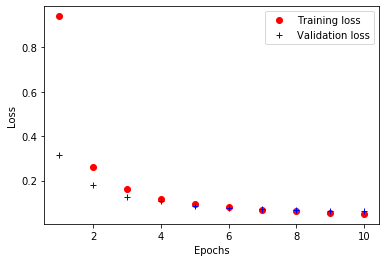

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

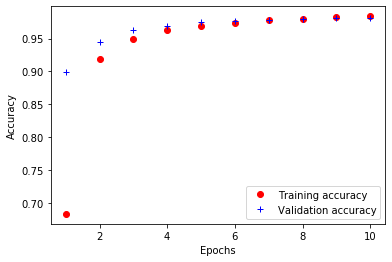

In [26]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Confusion matrix

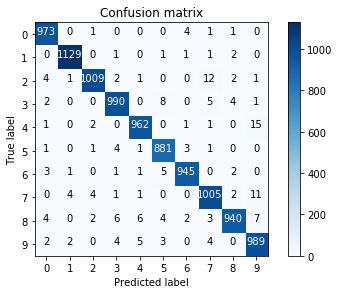

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Inspecting the output

In [28]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

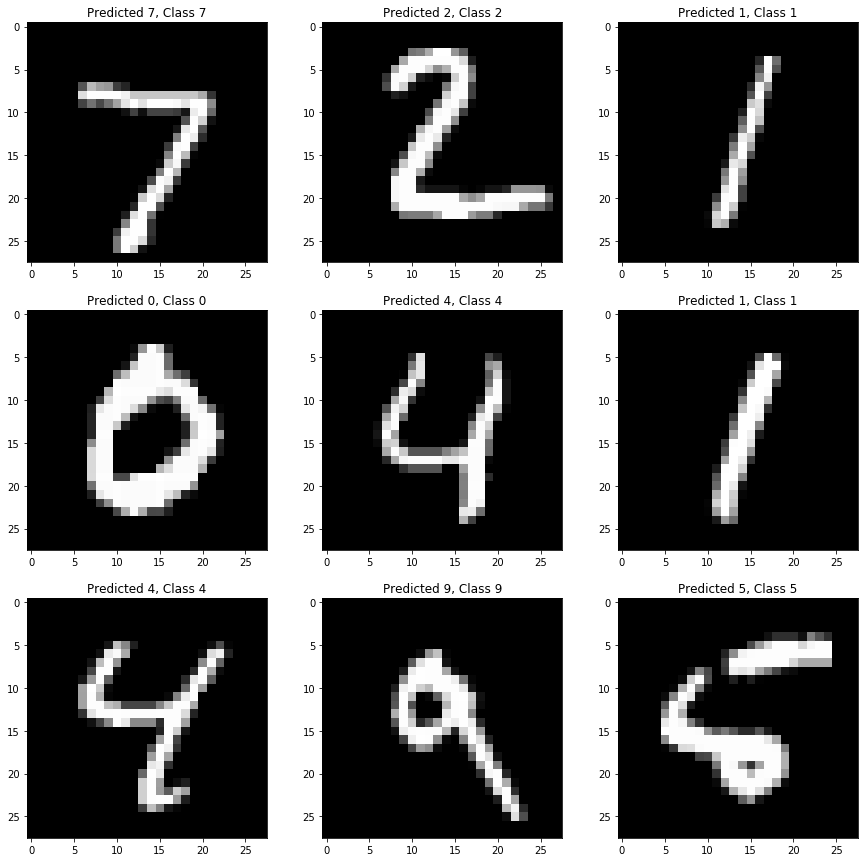

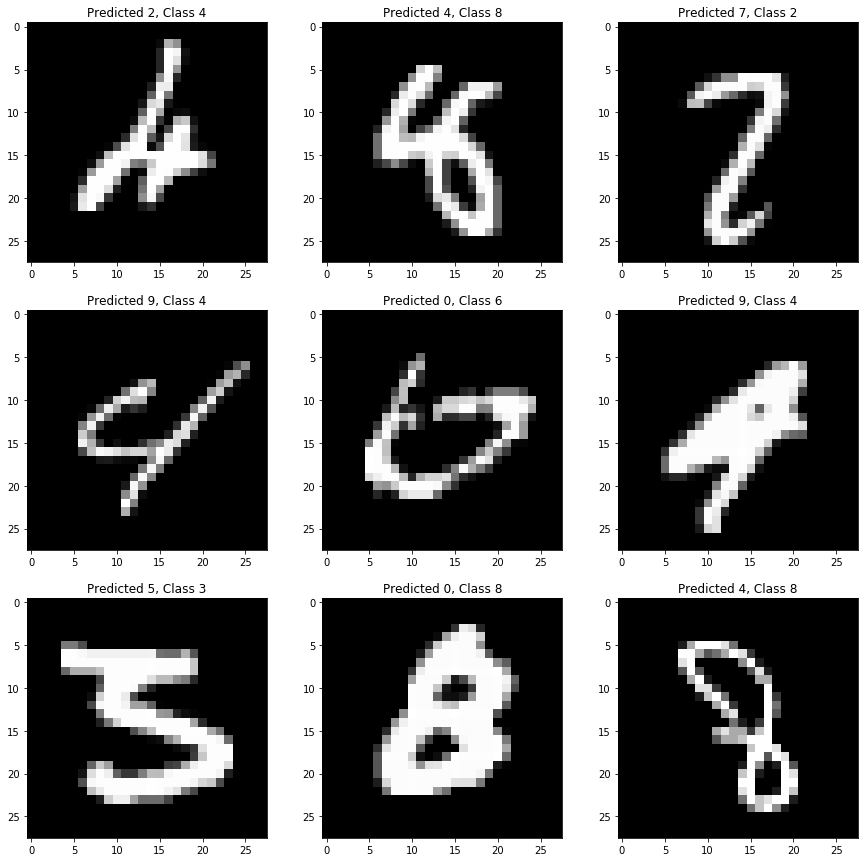

In [29]:
plt.rcParams['figure.figsize'] = (15,15) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Feature Visualization

In [30]:
input_tensor = Input(shape = (28,28,1))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)

pred = Dense(10, activation = 'softmax')(drop_layer)

model = Model(inputs = input_tensor, outputs = pred)

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

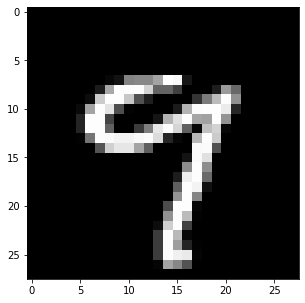

In [31]:
test = X_train[154]

plt.rcParams['figure.figsize'] = (5,5) 
plt.imshow(test.reshape(28,28), cmap='gray', interpolation='none')

In [32]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test.reshape(1,28,28,1))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


In [33]:
model.layers[:7]

# Visualization Conv2D

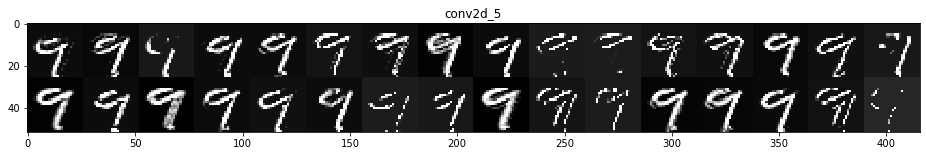

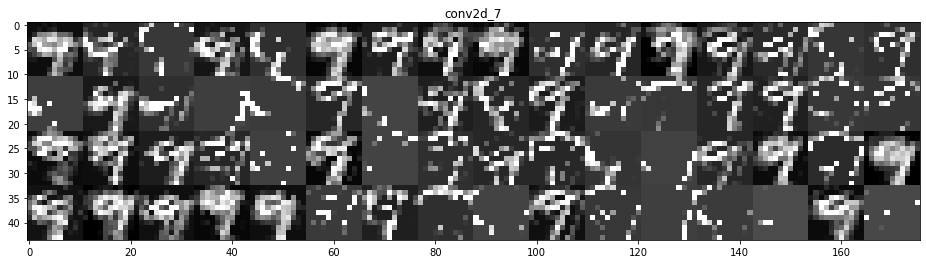

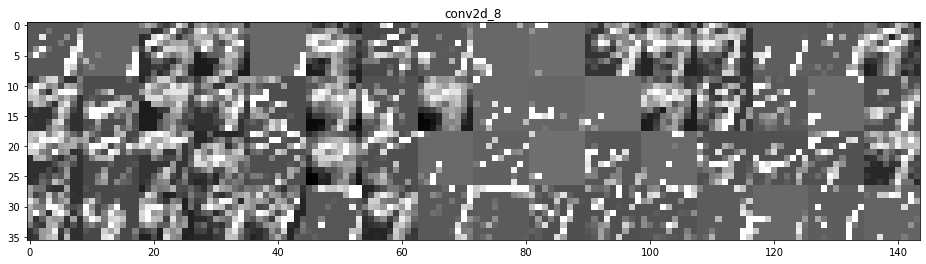

In [34]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')

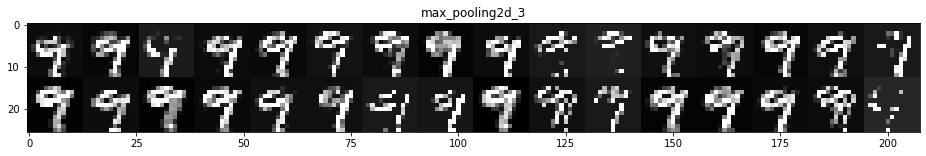

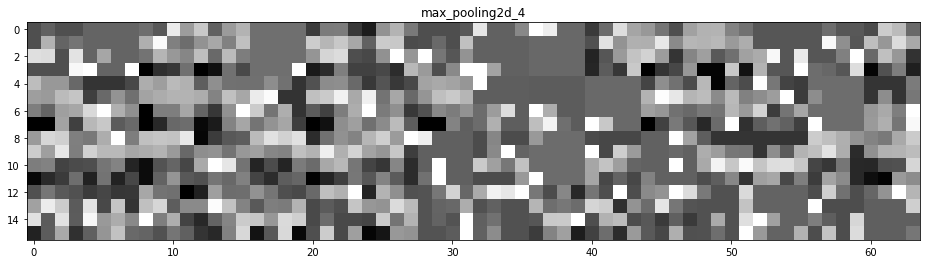

In [35]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')